<a href="https://colab.research.google.com/github/monetswildlife/Tools7970/blob/main/deepLearningNotebooks/3_analysis/SICBanalysisPipeline_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone the SICB Computer Vision Github
!git clone https://github.com/Crall-Lab/SICB2025_CV.git

Cloning into 'SICB2025_CV'...
remote: Enumerating objects: 630, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 630 (delta 64), reused 15 (delta 15), pack-reused 558 (from 1)
Receiving objects: 100% (630/630), 487.10 MiB | 16.03 MiB/s, done.
Resolving deltas: 100% (316/316), done.
Updating files: 100% (54/54), done.


# Creating single data folder

In [2]:
#@title Unzip all files

import subprocess
import glob

allZips = glob.glob('/content/SICB2025_CV/deepLearningNotebooks/3_analysis/data/*')
for ele in allZips:
  subprocess.run(['unzip', ele])


In [3]:
#@title Move images to a single folder
import glob
import os
import shutil

# For the training files
getFiles = glob.glob('/content/content/sicb_analysis/*/*')
os.makedirs('/content/analysisTest/')

for ele in getFiles:
  tempFile = '/content/analysisTest/'+ele.split('/')[-1]
  shutil.copyfile(ele,tempFile)

os.remove('/content/analysisTest/ap_07_101452_061721_1_2_1_4.jpg')
os.remove('/content/analysisTest/ap_07_111453_274319_1_2_1_4.jpg')
!rm /content/content/ -r

In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.0/112.6 GB disk)


In [5]:
from ultralytics import YOLO

In [8]:
# Google drive link to pretrained insect detector model (the one we just made in another colab thing)
https://drive.google.com/file/d/1OlW74Do6582i4e54mzbr6Xo9OFUUR349/view?usp=drive_link

SyntaxError: invalid decimal literal (<ipython-input-8-82b46dcc902f>, line 2)

In [9]:
#@title Auth and import
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import numpy as np
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [12]:
#zipModel = '/content/drive/MyDrive/augTestFinal/YOLOV8_bee_detectors/YOLOv8l.zip'
#import shutil
#shutil.copyfile('/content/drive/MyDrive/sicbV8L.pt','/content/model.zip')

In [13]:
import glob
getFiles = glob.glob('/content/analysisTest/*')
#model = YOLO('/content/sicbV8L.pt')  # load a pretrained YOLOv8n classification model
model = YOLO("/content/YOLOv8l/best.pt")

FileNotFoundError: [Errno 2] No such file or directory: '/content/YOLOv8l/best.pt'

In [ ]:
# looping in groups of 100 for memory conservation
import numpy as np
outputDictionary = {}
for ind1,ele in enumerate(np.arange(0,len(getFiles),100)):
  output = model(getFiles[ele:ele+100])  # predict on an image
  break


In [ ]:
import cv2 as cv
import os
bse = '/content/detectionCrops/'
if os.path.isdir(bse) is False:os.mkdir('/content/detectionCrops/')


noDetect = []
for detection in output:
  if np.shape(detection.boxes.xyxy) == (0,4):
    noDetect.append(detection.path)

  else:
    for ind2,ele in enumerate(detection.boxes.xyxy):
      x1 = int(ele[0])
      y1 = int(ele[1])
      x2 = int(ele[2])
      y2 = int(ele[3])
      cIm = detection.orig_img[y1:y2,x1:x2,:]
      cv.imwrite(bse+detection.path.split('/')[-1].split('.')[0]+'_%s'%ind2+'.jpg',cIm)

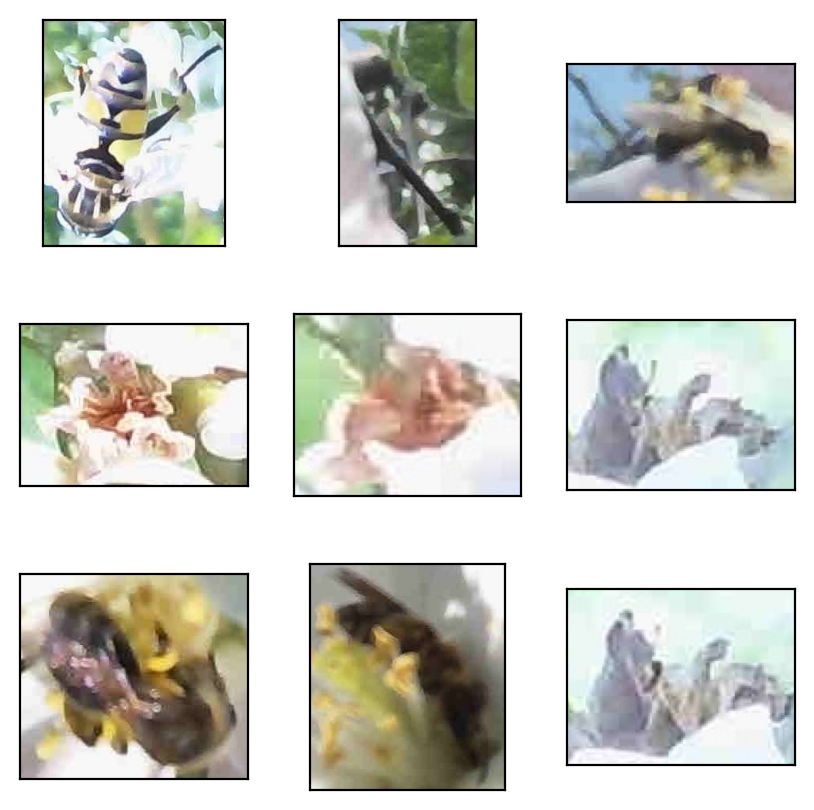

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(5,5),dpi=200)
crps = np.array(glob.glob('/content/detectionCrops/*'))
shf = np.arange(0,len(crps))
np.random.shuffle(shf)

cnt = 0
for xx in range(0,3):
  for yy in range(0,3):
    ax[xx,yy].imshow(cv.imread(crps[shf[cnt]])[:,:,::-1])
    ax[xx,yy].set_xticks([])
    ax[xx,yy].set_yticks([])
    cnt+=1

In [ ]:
# looping in groups of 100 for memory conservation
import numpy as np
import cv2 as cv
import os

bse = '/content/detectionCrops/'
if os.path.isdir(bse) is False:os.mkdir(bse)

outputDictionary = {}
noDetect = []
Detect = {'originalFile':[],'conf':[],'bbox':[],'crop':[]}


for ind1,ele in enumerate(np.arange(0,len(getFiles),100)):
  output = model(getFiles[ele:ele+100])  # predict on an image

  for detection in output:
    if np.shape(detection.boxes.xyxy) == (0,4):
      noDetect.append(detection.path)

    else:


      for ind2,ele in enumerate(detection.boxes.xyxy):
        x1 = int(ele[0])
        y1 = int(ele[1])
        x2 = int(ele[2])
        y2 = int(ele[3])
        cIm = detection.orig_img[y1:y2,x1:x2,:]

        tempName = bse+detection.path.split('/')[-1].split('.')[0]+'_%s'%ind2+'.jpg'
        cv.imwrite(tempName,cIm)

        Detect['originalFile'].append(detection.path)
        Detect['conf'].append(float(detection.boxes.conf[ind2]))
        Detect['bbox'].append([x1,y1,x2,y2])
        Detect['crop'].append(tempName)
  output = None

In [ ]:
import pandas as pd
d1 = pd.DataFrame.from_dict(Detect)
d1.to_csv('/content/output.csv')

In [ ]:
import tf
model = tf.keras.models.load_model('model')

In [ ]:
in2 = np.expand_dims(cv.resize(in1,(160,160)),0)
out1 = model2.predict(in2)